# Question 1:

a} Evaluating our function at  $(x\pm\delta and x\pm2\delta)$,then eliminate the third order Taylor series term from the numerical derivative. Truncation error becomes fifth order term.
Taylor expansions for $f(x\pm\delta)$ and $f(x\pm2\delta)$ and using the to get double sided derivative for each we get:

$
f(x+\delta)-f(x-\delta) = 2\delta f'(x)+\frac{1}{3}\delta^3f^{(3)}(x)+\frac{1}{60}\delta^5f^{(5)}(x)+... \\
f(x+2\delta)-f(x-2\delta) = 4\delta f'(x)+\frac{8}{3}\delta^3f^{(3)}(x)+\frac{8}{15}\delta^5f^{(5)}(x)+...
$

 combining these in order to cancel the 3rd order taylor term: 
 
 $
\begin{align}
f'(x) &= \frac{8(f(x+\delta)-8f(x-\delta))-(f(x+2\delta)-f(x-2\delta))}{12\delta} \\
f'(x) &= \frac{16\delta f'(x)+\frac{2}{15}\delta^5f^{(5)}(x)-4\delta f'(x)-\frac{8}{15}\delta^5 f^{(5)}(x)}{12\delta} \\
f'(x) &= f'(x) - \frac{1}{30}\delta^4f^{(5)}(x)
\end{align}
$

 our estimate of the derivative can then be taken as 
 
$f'(x)\approx\frac{-f(x+2\delta)+8f(x+\delta)-8f(x-\delta)+f(x-2\delta)}{12\delta}$, with truncation error on the order of $\delta^4f^{(5)}(x)$.

b) Error in the numerical derivative is the sum of truncation error and roundoff error.  Truncation error is on the order of $\delta^4f^{(5)}(x)$. The roundoff error is found by adding an error $\epsilon_i$ to each function. Assuming $\epsilon_i$ is approximately equal to the machine precision $\sim 10^{-16}$, and the change in f(x) over $\delta$ or $2\delta$ is small.

$
\begin{align}
E &= f'(x) - \frac{-f(x+2\delta)(1+\epsilon_1)+8f(x+\delta)(1+\epsilon_2)-8f(x-\delta)(1+\epsilon_3)+f(x-2\delta)(1+\epsilon_4)}{12\delta} \\
E &= \frac{1}{30}\delta^4f^{(5)}(x) - \frac{-f(x+2\delta)\epsilon_1+8f(x+\delta)\epsilon_2-8f(x-\delta)\epsilon_3+f(x-2\delta)\epsilon_4}{12\delta} \\
E &\approx \delta^4f^{(5)}(x) - \frac{f(x)}{12\delta}(-\epsilon_1+8\epsilon_2-8\epsilon_3+\epsilon_4)
\end{align}
$

If we assume all roundoff errors add together get $-\epsilon_1+8\epsilon_2-8\epsilon_3+\epsilon_4=18\epsilon$ for the max round off error, where $\epsilon$ is the machine precision. The total error is thus

$
E \lesssim \delta^4f^{(5)}(x) - \frac{3\epsilon f(x)}{2\delta}.
$

minimizing the error with respect to $\delta$ to optimize.

$
\begin{align}
\frac{\partial E}{\partial \delta} = 0 &= 4\delta^3 f^{(5)}(x) - \frac{3\epsilon f(x)}{2\delta^2} \\
\frac{3}{2}\epsilon f(x) &= 4\delta^5 f^{(5)}(x) \\
\delta &\sim \left(\frac{3\epsilon f(x)}{8f^{(5)}(x)}\right)^{1/5}
\end{align}
$

In [35]:
#defining a function that gives the numerical derivative a point x, given the function and
#the step, delta
def derivative(fun, x, delta):
    return (-fun(x+2*delta)+8*fun(x+delta)-8*fun(x-delta)+fun(x+2*delta))/(12*delta)

#taking the function and the fifth deriv, as well a machine precision to determine the
#optimal delta
def Delt(f, fp5, x, prec):
    return (3*prec*f(x)/(8*fp5(x)))**(1/5)

In [38]:
# declaring functions to use for determiation of step size
f1 = lambda x: np.exp(x)
f2 = lambda x: np.exp(0.01*x)

# analytic fifth deriv
f1_prime5 = f1
f2_prime5 = lambda x: (0.01**5)*np.exp(0.01*x)

# intial x value to check optimal delta
x = 0.3

# check how absolute error in the numerical derivative changes for values of delta
delta = np.logspace(-17,0,200)
# computing the numerical derivative for the points above
f1_num = derivative(f1, x, delta)
f2_num = derivative(f2, x, delta)

# Compare numerical derivative against the analytic derivative and get an error
f1_ana = np.exp(x)
f2_ana = 0.01*np.exp(0.01*x)
AbsErr1 = np.abs(f1_ana-f1_num)
AbsErr2 = np.abs(f2_ana-f2_num)


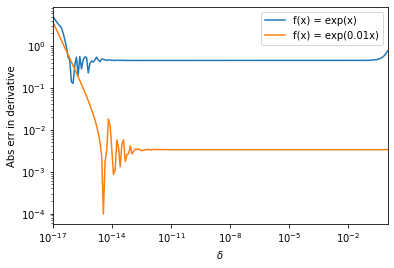

In [40]:
#plotting the error vs the delta step size that is being used for each of the functions
plt.loglog(delta, AbsErr1, label='f(x) = exp(x)')
plt.loglog(delta, AbsErr2, label='f(x) = exp(0.01x)')

plt.xlim(delta.min(), delta.max())
plt.xlabel(r'$\delta$')
plt.ylabel('Abs err in derivative')
plt.legend()
plt.show()

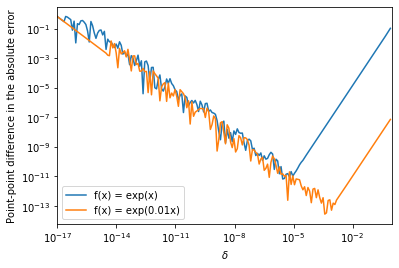

In [42]:
#taking a point by point difference in the absolute error ro determine the smallest change
plt.loglog(delta[0:-1], np.abs(np.diff(AbsErr1)), label='f(x) = exp(x)')
plt.loglog(delta[0:-1], np.abs(np.diff(AbsErr2)), label='f(x) = exp(0.01x)')
plt.xlim(delta.min(), delta.max())
plt.xlabel(r'$\delta$')
plt.ylabel('Point-point difference in the absolute error')
plt.legend()
plt.show()

Looking for the minima of the stable region in order to find the lowest error for a step size delta as this region appears flat on the logarithmic scale though it is not. This is hard to determine as this region appears flat on the logarithmic scale though it is not, but it appears to be around  $10^{-5}$ for $e^x$ and  $10^{-2}$ for $e^{0.01x}$

# Question 2:

Interpolated temperature for voltage at 1V is 92.8996409775585 +/- 0.0001687096472551275K.


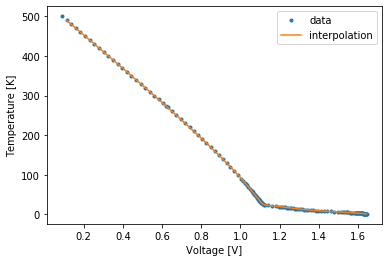

In [130]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import random
# load the text and sort into columns for temperature and voltage
dat=np.loadtxt("lakeshore.txt")
dat = dat[dat[:,1].argsort()]

temp=dat[:,0]
volt=dat[:,1]

temp_est=[]
volt_est=[]
#Create a list taking only every second point to get estimate of error
#by comparing the two interpolations
for i in range(len(temp)):
    if i % 2 == 0:
        temp_est.append(temp[i])
        volt_est.append(volt[i])




#creating function to do a cubic spline interpolation using every point
#and using every second point to get two interpolations and subtracting
#to get estimate of error

def CubeSplin(volt,temp,volt_est,temp_est,xi):
    
    xi = np.asarray(xi)
    spln=interpolate.splrep(volt, temp)
    
    y=interpolate.splev(xi,spln)
    
    
    spln_est=interpolate.splrep(volt_est,temp_est)
    y_est=interpolate.splev(xi,spln_est)
    
    y_err=np.abs(y_est-y)
    #err=np.mean(y_err)
    
    return y, y_err



x_int=1

#print the interpolated temperature and error for an arbitrary given voltage
yi_val, yi_err = CubeSplin(volt, temp, volt_est, temp_est, x_int)
print('Interpolated temperature for voltage at {:}V is {:} +/- {:}K.'.format(x_int, yi_val, yi_err))

#generate a plot of the data and the interpolation over the whole range of data
xx=np.linspace(volt[1],volt[-2],1001) 

yy, yy_err = CubeSplin(volt, temp, volt_est, temp_est, xx)

plt.clf()
plt.plot(volt, temp, '.', label='data')
plt.plot(xx,yy, label = 'interpolation')
#plt.plot(xx,y_est)
plt.xlabel('Voltage [V]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.show()


# Question 3:

In [131]:


#making a function that does a recursive integration without reusing points
def bet_integr(fun,a,b,tol,y_old0=None,y_old1=None,y_old2=None):
    
    # creating values over the range of points and taking the number of evaluations
    x=np.linspace(a,b,5)
    neval=len(x) 
    y=np.zeros(5)
    #dx=(b-a)/4.0
    
    # if there are no previous y values all the values are calculated as the func of x
    if y_old0==None:
        y=fun(x)
        
    #if y values are already calculated the first, mid and final points will 
    #also be in the next evaluatiom so we reuse them instead of calculating them again
    else:
        y=[y_old0,fun(x[1]),y_old1,fun(x[3]),y_old2]
        neval=neval-3
        
        
    #calculating the integral with the same functions as in class
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)
    myerr=np.abs(f2-f1)
    #print([a,b,f1,f2])
    
    #if the err is below the tolerance return the integral, error and number of eval
    if (myerr<tol):
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval
    
    #else divide the range in half and pass the y values that will be the same to the
    #recursive integral
    else:
        mid=0.5*(b+a)
        # for the left half of the integral the first 3 values will be used
        #so we pass them to the left integral
        f_left,err_left,neval_left=bet_integr(fun,a,mid,tol/2.0,y[0],y[1],y[2])
        #for the right half the last 3 values will be used
        f_right,err_right,neval_right=bet_integr(fun,mid,b,tol/2.0,y[2],y[3],y[4])
        neval=neval+neval_left+neval_right
        f=f_left+f_right
        err=err_left+err_right
        return f,err,neval













In [58]:
#using the integration function we did inclass for comparison 
def simple_integrate(fun,a,b,tol):
    x=np.linspace(a,b,5)
    dx=(b-a)/4.0
    y=fun(x)
    neval=len(x) #let's keep track of function evaluations
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)
    myerr=np.abs(f2-f1)
#     print([a,b,f1,f2])
    if (myerr<tol):
        return (16.0*f2-f1)/15.0,myerr,neval
    else:
        mid=0.5*(b+a)
        f_left,err_left,neval_left=simple_integrate(fun,a,mid,tol/2.0)
        f_right,err_right,neval_right=simple_integrate(fun,mid,b,tol/2.0)
        neval=neval+neval_left+neval_right
        f=f_left+f_right
        err=err_left+err_right
        return f,err,neval

In [59]:
#comparing the two recursive integrators for y=e^x
f_bet,err_bet,neval_bet=bet_integr(np.exp,-1,1,1e-3)
f_simple, err_simple, neval_simple = simple_integrate(np.exp, -1, 1, 1e-3)
pred = np.exp(1)-np.exp(-1)
print('f,err,neval for the new method are' + repr([f_bet,err_bet,neval_bet])+' with err ' + repr(np.abs(f_bet-pred)))

print( 'f,err,neval for the simple method are ' + repr([f_simple,err_simple,neval_simple])+' with err ' + repr(np.abs(f_simple-pred)))

f,err,neval for the new method are[2.350402717226764, 0.00023419190498064069, 13] with err 3.299391613253988e-07
f,err,neval for the simple method are [2.350402717226764, 0.00023419190498064069, 25] with err 3.299391613253988e-07


In [64]:
#comparing for y=sin(x)
f_bet,err_bet,neval_bet=bet_integr(np.sin,0,np.pi,1e-3)
f_simple, err_simple, neval_simple = simple_integrate(np.sin, 0, np.pi, 1e-3)
pred = 2
print('f,err,neval for the new method are' + repr([f_bet,err_bet,neval_bet])+' with err ' + repr(np.abs(f_bet-pred)))

print( 'f,err,neval for the simple method are ' + repr([f_simple,err_simple,neval_simple])+' with err ' + repr(np.abs(f_simple-pred)))

f,err,neval for the new method are[1.999999752454572, 0.00025257890045210507, 17] with err 2.475454279338152e-07
f,err,neval for the simple method are [1.999999752454572, 0.00025257890045210507, 35] with err 2.475454279338152e-07


In [66]:
#comparing for y = e^(-(x^2)/2)
func3 = lambda x: np.exp(-x**2/2)
f_bet,err_bet,neval_bet=bet_integr(func3,-1,1,1e-3)
f_simple, err_simple, neval_simple = simple_integrate(func3, -1, 1, 1e-3)
pred = 0
print('f,err,neval for the new method are' + repr([f_bet,err_bet,neval_bet])+' with err ' + repr(np.abs(f_bet-pred)))

print( 'f,err,neval for the simple method are ' + repr([f_simple,err_simple,neval_simple])+' with err ' + repr(np.abs(f_simple-pred)))

f,err,neval for the new method are[1.7112446270198851, 0.0008701215598000411, 9] with err 1.7112446270198851
f,err,neval for the simple method are [1.7112446270198851, 0.0008701215598000411, 15] with err 1.7112446270198851


# Question 4:

To solve for the electric field we use the equation that 
$
\begin{align}
E &= \frac{1}{4\pi\epsilon_0}\int \frac{\sigma}{r^2}\hat{r}da\ \ \text{and} \ \
r=\sqrt{z^2+R^2-2zR\cos\theta}\ \ \text{and}\ \hat{r}=\frac{z-R\cos\theta}{r}. \\
E(z) &= \frac{1}{4\pi\epsilon_0} \int_0^{2\pi}\int_0^\pi \frac{ \sigma R^2\sin\theta(z-R\cos\theta)}{(z^2+R^2-2zR\cos\theta)^{3/2}}d\theta d\phi \\
E(z) &= \frac{q}{8\pi\epsilon_0} \int_0^\pi \frac{\sin\theta(z-R\cos\theta)}{(z^2+R^2-2zR\cos\theta)^{3/2}}d\theta.
\end{align}
$

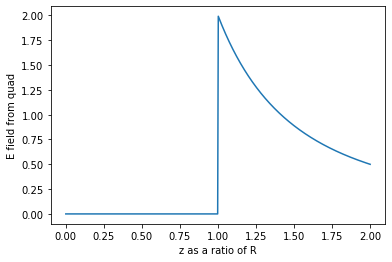

In [80]:
#doing a quadratic integration method from scipy

import matplotlib.pyplot as plt
R=1
from scipy.integrate import quad

# evaluate for values ranging from 0 to twice the radius 
z_val=np.linspace(0,2*R,1001)

#setting up the function as defined above
func=lambda theta: ((z-R*np.cos(theta))*np.sin(theta))/((R**2+z**2-2*R*z*np.cos(theta))**(3/2))
#creating an empty list to take the E field values
E_quad=[]

#appending the calculated e values to the list
for i in range(len(z_val)):
    z=z_val[i]

    E_quad.append(quad(func,0,np.pi)[0])

plt.plot(z_val,E_quad)
plt.xlabel('z as a ratio of R')
plt.ylabel('E field from quad')
plt.show()

#print(gral())
#z=np.linspace(0,2*R,1000)



In [82]:
E_recur=[]
for i in range(len(z_val)):
    z=z_val[i]
    E_recur.append(bet_integr(func,0,np.pi, 1e-3)[0])

plt.plot(z_val, E_recur)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


RecursionError: maximum recursion depth exceeded while calling a Python object

There is a singularity at z=R as the E field immediately rises from zero. This does not effect the quadratic integration method. However, the recursive method is unable to calculate the integral due to the singularity at z=R which cannot be evaluated.

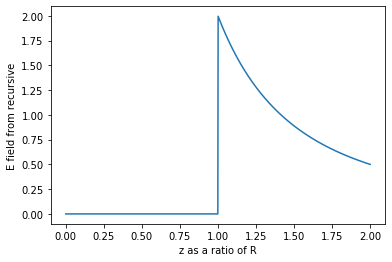

In [86]:
#if we doing the recursive integration but without passing through the singularity at z=R
#it will not fail
z_val=np.linspace(0,2*R,1000) # this will not pass through z=R
E_recur=[]
for i in range(len(z_val)):
    z=z_val[i]
    E_recur.append(bet_integr(func,0,np.pi, 1e-4)[0])

plt.plot(z_val, E_recur)
plt.xlabel('z as a ratio of R')
plt.ylabel('E field from recursive')
plt.show()


In [129]:

# another attempt at question 2 with bootstrapping
from numpy import random
def CubeSplin(volt,temp,x):
    
    
    xi = np.asarray(x)
    #spln=interpolate.splrep(volt, temp)
    
    #y=interpolate.splev(xi,spln)
    
    boot_inds=random.choice(len(temp), int(len(temp)/2), replace= False)
    boot_inds.sort()                      
    non_boot_inds=[i for i in range(len(temp)) if i not in boot_inds]

    temp_boot = temp[boot_inds]
    temp_non_boot = temp[non_boot_inds]
    
    volt_boot = volt[boot_inds]
    volt_non_boot = volt[non_boot_inds]
    
    spln_boot=interpolate.splrep(volt_boot,temp_boot)
    y_boot=interpolate.splev(xi,spln_boot)
    
    #spln_est=interpolate.splrep(volt_est,temp_est)
    #y_est=interpolate.splev(xi,spln_est)
    xmin_index=[]
    for i in range(len(volt_non_boot)):
        xmin_index.append(np.abs(min(volt-volt_non_boot[i]))
        
    yerr=np.abs(y_boot(xmin_index)-temp(xmin_index))
    
    return y, y_err

#x_int=1
x=np.linspace(volt[0],volt[-1],1000)
#print the interpolated temperature and error for an arbitrary given voltage
yi_val, yi_err = CubeSplin(volt,temp,x)
print('Interpolated temperature for voltage at {:}V is {:} +/- {:}K.'.format(x_int, yi_val, yi_err))



AttributeError: 'numpy.float64' object has no attribute 'where'